## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code

In [1]:
from bia_bob import bob
bob.__version__

'0.3.0'

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
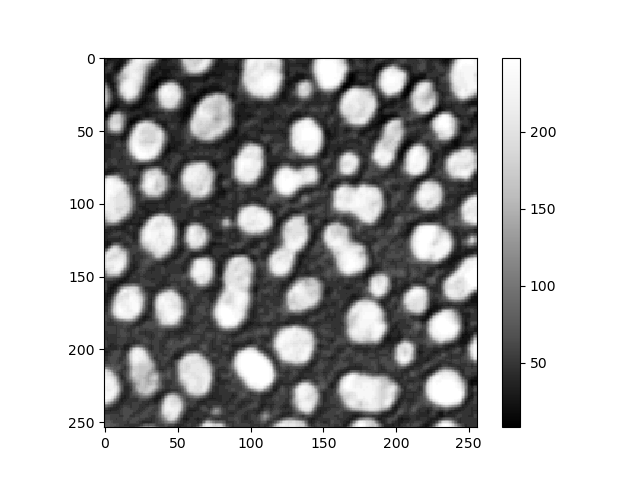
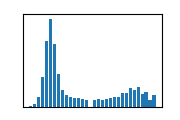

In [3]:
from skimage.io import imread
import stackview

image = imread('blobs.tif')
stackview.insight(image)

In [4]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

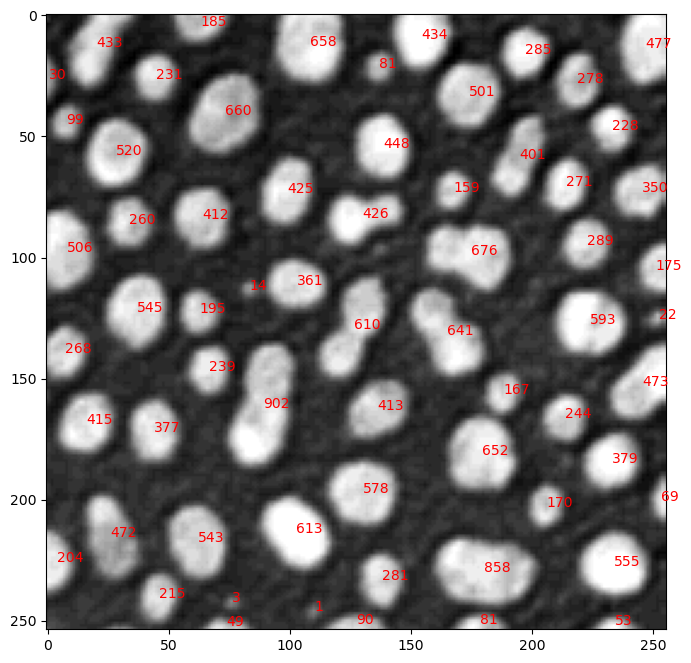

In [5]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import stackview

# Load the image
image = imread('blobs.tif')

# Apply Otsu's thresholding
threshold = threshold_otsu(image)
binary_image = image > threshold

# Perform connected component labeling
labels = label(binary_image)

# Measure area of the segmented labels
props = regionprops(labels)
areas = [prop.area for prop in props]

# Create an image with labels and area values on top
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray')

for prop in props:
    y, x = prop.centroid
    area = prop.area
    ax.text(x, y, f"{area}", color='red')

stackview.curtain(image, labels)